# **New York City Yellow Taxi Data** - Chinmay H R

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

In [5]:
# Import the libraries you will be using for analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [11]:
# Try loading one file

df = pd.read_parquet('Downloads/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [13]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [15]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd
# Select the folder having data files
os.chdir('C:\\Users\\HP\\trip_records')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)
        
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        month_df['pickup_date']= month_df['tpep_pickup_datetime'].dt.date
        month_df['pickup_hour']= month_df['tpep_pickup_datetime'].dt.hour
       
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['pickup_date'].unique():
            date_df= month_df[month_df['pickup_date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_df[date_df['pickup_hour'] == hour]
                # Sample 5% (0.05) of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample]) 
               

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [132]:
# Taking only 300000 entries
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)

In [134]:
# Store the df in csv/parquet
df.to_parquet('yellow_taxi_2023')
print(df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
881961          2  2023-06-10 17:42:10   2023-06-10 18:15:08                2   
1092404         1  2023-08-23 14:29:17   2023-08-23 14:46:35                1   
1247834         2  2023-02-23 19:32:34   2023-02-23 19:37:32                4   
515866          2  2023-12-05 12:34:29   2023-12-05 12:49:27                5   
742217          2  2023-03-21 17:33:57   2023-03-21 17:44:11                1   
...           ...                  ...                   ...              ...   
1573895         2  2023-05-24 14:18:27   2023-05-24 15:09:40                1   
1625511         1  2023-07-05 08:17:25   2023-07-05 08:29:42                1   
646993          2  2023-12-29 11:33:40   2023-12-29 11:40:19                1   
222167          2  2023-10-12 20:46:47   2023-10-12 21:00:48                5   
1035674         2  2023-08-10 16:19:45   2023-08-10 17:00:08                2   

         trip_distance  Rat

In [19]:
import os
print("Saved at:", os.getcwd())


Saved at: C:\Users\HP


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [844]:
# Import warnings

In [846]:

# Import the libraries you will be using for analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [848]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


In [850]:
# Load the new data file

df= pd.read_parquet("yellow_taxi_2023")

In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2118846 to 1813634
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   store_and_fwd_flag     289777 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

In [854]:
# Taking only 300,000 random rows
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)

In [856]:
# Store the df in csv/parquet
df.to_parquet('yellow_taxi_2023')
print(df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2118846         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
828655          2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
374435          2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
2503231         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
375011          2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   
...           ...                  ...                   ...              ...   
2632663         2  2023-04-25 21:51:07   2023-04-25 22:07:37              1.0   
184123          1  2023-05-02 19:34:15   2023-05-02 19:40:17              1.0   
978662          1  2023-12-09 10:57:21   2023-12-09 11:08:29              1.0   
148204          2  2023-04-02 12:08:20   2023-04-02 12:20:28              1.0   
1813634         2  2023-03-17 18:07:16   2023-03-17 18:38:15              1.0   

         trip_distance  Rat

In [857]:
# to know the path of file for future use
import os
print("Saved at:", os.getcwd())


Saved at: C:\Users\HP


In [860]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2118846         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
828655          2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
374435          2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
2503231         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
375011          2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2118846           3.56         1.0                  N            24   
828655            0.90         1.0                  N           186   
374435           21.09         2.0                  N           132   
2503231           2.57         1.0                  N           186   
375011            1.74         1.0                  N           142   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2118846           141             1         17.0    1.0      0.5        5.50   
828655            170             2         10.0    0.0      0.5        0.00   
374435            151             1         70.0    0.0      0.5       10.00   
2503231           239             1         23.3    0.0      0.5        5.46   
375011            237             1         11.4    2.5      0.5        3.58   

         tolls_amount  improvement_surcharge  total_amount  \
2118846          0.00                    1.0         27.50   
828655           0.00                    1.0         14.00   
374435           6.55                    1.0         89.30   
2503231          0.00                    1.0         32.76   
375011           0.00                    1.0         21.48   

         congestion_surcharge  airport_fee pickup_date  pickup_hour  \
2118846                   2.5          NaN  2023-04-21            1   
828655                    2.5          0.0  2023-01-10           14   
374435                    0.0          NaN  2023-02-04           15   
2503231                   2.5          NaN  2023-03-24           12   
375011                    2.5          NaN  2023-09-05           17   

         Airport_fee  
2118846         0.00  
828655           NaN  
374435          1.25  
2503231         0.00  
375011          0.00

In [862]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2118846 to 1813634
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   store_and_fwd_flag     289777 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [866]:
# Checking the df strucure
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2118846 to 1813634
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   store_and_fwd_flag     289777 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'Airport_fee'],
      dtype='object')

In [868]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True,inplace=True)
df #Checking index

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1              2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2              2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3              2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4              2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   
...          ...                  ...                   ...              ...   
299995         2  2023-04-25 21:51:07   2023-04-25 22:07:37              1.0   
299996         1  2023-05-02 19:34:15   2023-05-02 19:40:17              1.0   
299997         1  2023-12-09 10:57:21   2023-12-09 11:08:29              1.0   
299998         2  2023-04-02 12:08:20   2023-04-02 12:20:28              1.0   
299999         2  2023-03-17 18:07:16   2023-03-17 18:38:15              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                3.56         1.0                  N            24   
1                0.90         1.0                  N           186   
2               21.09         2.0                  N           132   
3                2.57         1.0                  N           186   
4                1.74         1.0                  N           142   
...               ...         ...                ...           ...   
299995           3.34         1.0                  N           255   
299996           1.30         1.0                  N            90   
299997           1.70         1.0                  N           236   
299998           1.80         1.0                  N           143   
299999           4.01         1.0                  N           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                141             1         17.0    1.0      0.5        5.50   
1                170             2         10.0    0.0      0.5        0.00   
2                151             1         70.0    0.0      0.5       10.00   
3                239             1         23.3    0.0      0.5        5.46   
4                237             1         11.4    2.5      0.5        3.58   
...              ...           ...          ...    ...      ...         ...   
299995            79             1         18.4    1.0      0.5        4.68   
299996           246             1          8.6    5.0      0.5        3.00   
299997           161             1         12.8    2.5      0.5        3.36   
299998           141             1         13.5    0.0      0.5        0.88   
299999           211             1         28.9    2.5      0.5        7.08   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         27.50   
1               0.00                    1.0         14.00   
2               6.55                    1.0         89.30   
3               0.00                    1.0         32.76   
4               0.00                    1.0         21.48   
...              ...                    ...           ...   
299995          0.00                    1.0         28.08   
299996          0.00                    1.0         18.10   
299997          0.00                    1.0         20.16   
299998          0.00                    1.0         18.38   
299999          0.00                    1.0         42.48   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  \
0                        2.5          NaN  2023-04-21            1   
1                        2.5          0.0  2023-01-10           14   
2                        0.0          NaN  2023-02-04           15   
3                        2.5          NaN  2023-03-24           12   
4                        2.5          NaN  2023-09-05           17   
...                      ...          ...         ...          ...   
299995                   2.5      

In [870]:
df.isnull().mean()*100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.407667
trip_distance             0.000000
RatecodeID                3.407667
store_and_fwd_flag        3.407667
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.407667
airport_fee              92.246667
pickup_date               0.000000
pickup_hour               0.000000
Airport_fee              11.161000
dtype: float64

In [872]:
# Displaying all Columns for manual purpose
pd.set_option("display.max_columns",None)
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1              2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2              2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3              2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4              2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   
...          ...                  ...                   ...              ...   
299995         2  2023-04-25 21:51:07   2023-04-25 22:07:37              1.0   
299996         1  2023-05-02 19:34:15   2023-05-02 19:40:17              1.0   
299997         1  2023-12-09 10:57:21   2023-12-09 11:08:29              1.0   
299998         2  2023-04-02 12:08:20   2023-04-02 12:20:28              1.0   
299999         2  2023-03-17 18:07:16   2023-03-17 18:38:15              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                3.56         1.0                  N            24   
1                0.90         1.0                  N           186   
2               21.09         2.0                  N           132   
3                2.57         1.0                  N           186   
4                1.74         1.0                  N           142   
...               ...         ...                ...           ...   
299995           3.34         1.0                  N           255   
299996           1.30         1.0                  N            90   
299997           1.70         1.0                  N           236   
299998           1.80         1.0                  N           143   
299999           4.01         1.0                  N           163   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                141             1         17.0    1.0      0.5        5.50   
1                170             2         10.0    0.0      0.5        0.00   
2                151             1         70.0    0.0      0.5       10.00   
3                239             1         23.3    0.0      0.5        5.46   
4                237             1         11.4    2.5      0.5        3.58   
...              ...           ...          ...    ...      ...         ...   
299995            79             1         18.4    1.0      0.5        4.68   
299996           246             1          8.6    5.0      0.5        3.00   
299997           161             1         12.8    2.5      0.5        3.36   
299998           141             1         13.5    0.0      0.5        0.88   
299999           211             1         28.9    2.5      0.5        7.08   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         27.50   
1               0.00                    1.0         14.00   
2               6.55                    1.0         89.30   
3               0.00                    1.0         32.76   
4               0.00                    1.0         21.48   
...              ...                    ...           ...   
299995          0.00                    1.0         28.08   
299996          0.00                    1.0         18.10   
299997          0.00                    1.0         20.16   
299998          0.00                    1.0         18.38   
299999          0.00                    1.0         42.48   

        congestion_surcharge  airport_fee pickup_date  pickup_hour  \
0                        2.5          NaN  2023-04-21            1   
1                        2.5          0.0  2023-01-10           14   
2                        0.0          NaN  2023-02-04           15   
3                        2.5          NaN  2023-03-24           12   
4                        2.5          NaN  2023-09-05           17   
...                      ...          ...         ...          ...   
299995                   2.5      

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [875]:
# Combine the two airport fee columns
airport_fee = pd.concat([df['airport_fee'], df['Airport_fee']], axis=1)

#Summing row Wise, Skipping the NaN
df['airport_fee'] = airport_fee.sum(axis=1, skipna=True)

In [876]:
#Todrop the duplicate colmn
df.drop(['Airport_fee'],axis=1,inplace=True)

In [878]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour  
0  2023-04-21            1  
1  2023-01-10           14

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [882]:
# check where values of fare amount are negative

neg_fare = df[df['fare_amount']<0]
print(neg_fare.shape[0])  # to get the count of negative values in the rows

0


Did you notice something different in the `RatecodeID` column for above records?

In [884]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour  
0  2023-04-21            1  
1  2023-01-10           14

In [885]:
# Analyse RatecodeID for the negative fare amounts
rateid_analysis = neg_fare['RatecodeID'].value_counts(dropna=False)
print(rateid_analysis)

Series([], Name: count, dtype: int64)


In [887]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=['number'])
# Check for negative values
for col in numeric_df.columns:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"Column ' { col } ' has {negative_count} negative values.")


Column ' mta_tax ' has 15 negative values.
Column ' improvement_surcharge ' has 16 negative values.
Column ' total_amount ' has 16 negative values.
Column ' congestion_surcharge ' has 14 negative values.
Column ' airport_fee ' has 3 negative values.


In [890]:
# fix these negative values
negative_mask = (numeric_df < 0).any(axis=1)
df = df[~negative_mask].reset_index(drop=True)
df.shape


(299984, 21)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [893]:
# Find the proportion of missing values in each column

df.isnull().mean()*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.407848
trip_distance            0.000000
RatecodeID               3.407848
store_and_fwd_flag       3.407848
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.407848
airport_fee              0.000000
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [895]:
df.passenger_count.describe()

count    289761.000000
mean          1.370309
std           0.893475
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: passenger_count, dtype: float64

In [896]:
# Display the rows with null values
df[df['passenger_count'].isnull()]

# Impute NaN values in 'passenger_count'
def for_mode(df, col):
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled '{col}' with mode: {mode_value}")
    else:
        print(f"Column '{col}' not found in df")

for_mode(df,'passenger_count')


Filled 'passenger_count' with mode: 1.0


C:\Users\HP\AppData\Local\Temp\ipykernel_11904\2054918343.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [897]:
df.passenger_count.isnull().mean()

0.0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [900]:
df.RatecodeID.describe()

count    289761.000000
mean          1.643230
std           7.447394
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [902]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().mean()

for_mode(df, 'RatecodeID')

Filled 'RatecodeID' with mode: 1.0


C:\Users\HP\AppData\Local\Temp\ipykernel_11904\2054918343.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [903]:
df['RatecodeID'].isnull().mean()

0.0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [913]:
df.congestion_surcharge.describe()

count    289761.000000
mean          2.307065
std           0.667169
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [914]:
# handle null values in congestion_surcharge
df.congestion_surcharge.isnull().mean()
df['congestion_surcharge'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\2719588105.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


In [915]:
df.congestion_surcharge.isnull().mean()

0.0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [917]:
# Handle any remaining missing values
missing_cols= df.columns[df.isnull().any()]
for col in missing_cols:
    for_mode(df, col)

Filled 'store_and_fwd_flag' with mode: N


C:\Users\HP\AppData\Local\Temp\ipykernel_11904\2054918343.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [921]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  299984.000000                      299984                      299984   
mean        1.733942  2023-07-03 00:12:35.597789  2023-07-03 00:30:00.121709   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-02 21:56:55.250000  2023-04-02 22:18:06.750000   
50%         2.000000         2023-06-27 16:10:26  2023-06-27 16:37:21.500000   
75%         2.000000  2023-10-06 21:33:03.250000  2023-10-06 21:47:32.500000   
max         6.000000         2023-12-31 23:45:46         2024-01-01 00:15:03   
std         0.447219                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    299984.000000  299984.000000  299984.000000  299984.000000   
mean          1.357689       3.727252       1.621310     165.224352   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.040000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000   22910.920000      99.000000     265.000000   
std           0.880685      69.117655       7.320326      64.135894   

        DOLocationID   payment_type    fare_amount          extra  \
count  299984.000000  299984.000000  299984.000000  299984.000000   
mean      164.123703       1.164319      19.826460       1.584720   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     999.000000      20.800000   
std        69.813690       0.507187      18.360941       1.828818   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  299984.000000  299984.000000  299984.000000          299984.000000   
mean        0.495266       3.548264       0.590956               0.998974   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     200.000000      87.500000               1.000000   
std         0.048538       4.119575       2.174320               0.029465   

        total_amount  congestion_surcharge    airport_fee    pickup_hour  
count  299984.000000         299984.000000  299984.000000  299984.000000  
mean       28.882358              2.228444       0.138015      14.256944  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        30.842500              2.500000       0.000000      19.000000  
max      1000.000000              2.500000       1.750000      23.000000  
std        22.908830              0.777914       0.457619       5.816534

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [928]:
# Dropping where passenger_count is less than 1 (no passenger) or more than 6 (max capacity exceeded)
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

In [930]:
# Continue with outlier handling
# Dropping where trip_distance is 0 , more than 250 miles and pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['trip_distance'] <= 250]))]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1238039998.py, line 3)

In [ ]:
# Dropping where pickup and dropoff zones are different
df= df[~((df['PULocationID'] != df['DOLocationID']))]

In [ ]:
# Dropping wheere fare  nearly 0 and fare_amount is > 300
df = df[~((df['fare_amount'] == 0) & (df['fare_amount'] > 300))]

In [ ]:
# Dropping invalid payment_type
df = df[df['payment_type'] != 0]

In [ ]:
df.info()

In [ ]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n Column: {col}")
    print(f"Unique Values ({len(unique_vals)}), {unique_vals[:10]}")

In [ ]:
# Do any columns need standardising?
df['passenger_count'] = df['passenger_count'].fillna(1).astype('Int64')
df['RatecodeID'] = df['RatecodeID'].fillna(1).astype('Int64')  # assuming 1 = standard rate
df['payment_type'] = df['payment_type'].astype('Int64')
df['pickup_date'] = pd.to_datetime(df['pickup_date'], errors='coerce')

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [931]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [934]:
#defining a fuction for Categorization of columns
def categorize_columns(df):
    # creating empty columns to use append later
    numerical_cols = []     
    categorical_cols = []

    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_cols.append(col)
        elif 'datetime' in str(df[col].dtype):
            categorical_cols.append(col)  # Treat datetime as categorical for grouping
        elif df[col].nunique() < 20 and df[col].dtype in ['int64', 'int32', 'float64']:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)

    return numerical_cols, categorical_cols
numerical_cols, categorical_cols = categorize_columns(df)
# Categorized into 
print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)


Numerical Columns:
 ['trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'pickup_hour']

Categorical Columns:
 ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'pickup_date']


In [935]:
# Applying Summary stats
df.describe().T


count                        mean  \
VendorID               295348.0                    1.745412   
tpep_pickup_datetime     295348  2023-07-03 02:09:12.799836   
tpep_dropoff_datetime    295348  2023-07-03 02:26:39.758732   
passenger_count        295348.0                    1.378973   
trip_distance          295348.0                    3.741049   
RatecodeID             295348.0                    1.627876   
PULocationID           295348.0                  165.184873   
DOLocationID           295348.0                  164.102242   
payment_type           295348.0                    1.163001   
fare_amount            295348.0                   19.864642   
extra                  295348.0                    1.558039   
mta_tax                295348.0                    0.495251   
tip_amount             295348.0                    3.554437   
tolls_amount           295348.0                    0.594215   
improvement_surcharge  295348.0                    0.998986   
total_amount           295348.0                   28.932078   
congestion_surcharge   295348.0                    2.227017   
airport_fee            295348.0                    0.138758   
pickup_hour            295348.0                   14.260882   

                                       min                         25%  \
VendorID                               1.0                         1.0   
tpep_pickup_datetime   2023-01-01 00:04:55  2023-04-02 22:54:19.750000   
tpep_dropoff_datetime  2023-01-01 00:10:20         2023-04-02 23:09:55   
passenger_count                        1.0                         1.0   
trip_distance                          0.0                        1.04   
RatecodeID                             1.0                         1.0   
PULocationID                           1.0                       132.0   
DOLocationID                           1.0                       114.0   
payment_type                           0.0                         1.0   
fare_amount                            0.0                         9.3   
extra                                  0.0                         0.0   
mta_tax                                0.0                         0.5   
tip_amount                             0.0                         1.0   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  0.0                         1.0   
total_amount                           0.0                       15.96   
congestion_surcharge                   0.0                         2.5   
airport_fee                            0.0                         0.0   
pickup_hour                            0.0                        11.0   

                                              50%                         75%  \
VendorID                                      2.0                         2.0   
tpep_pickup_datetime   2023-06-27 18:18:51.500000  2023-10-06 23:59:20.250000   
tpep_dropoff_datetime         2023-06-27 18:33:52  2023-10-07 00:15:48.250000   
passenger_count                               1.0                         1.0   
trip_distance                                 1.8                         3.4   
RatecodeID                                    1.0                         1.0   
PULocationID                                162.0                       234.0   
DOLocationID                                162.0                       234.0   
payment_type                                  1.0                         1.0   
fare_amount                                  13.5                        21.9   
extra                                         1.0                         2.5   
mta_tax                                       0.5                         0.5   
tip_amount                                   2.85                        4.45   
tolls_amount                                  0.0                         0.0   
improvement_surcharge                         1.0                    

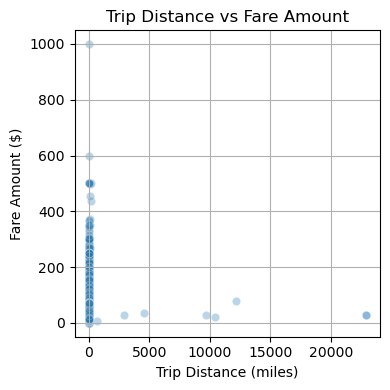

In [936]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


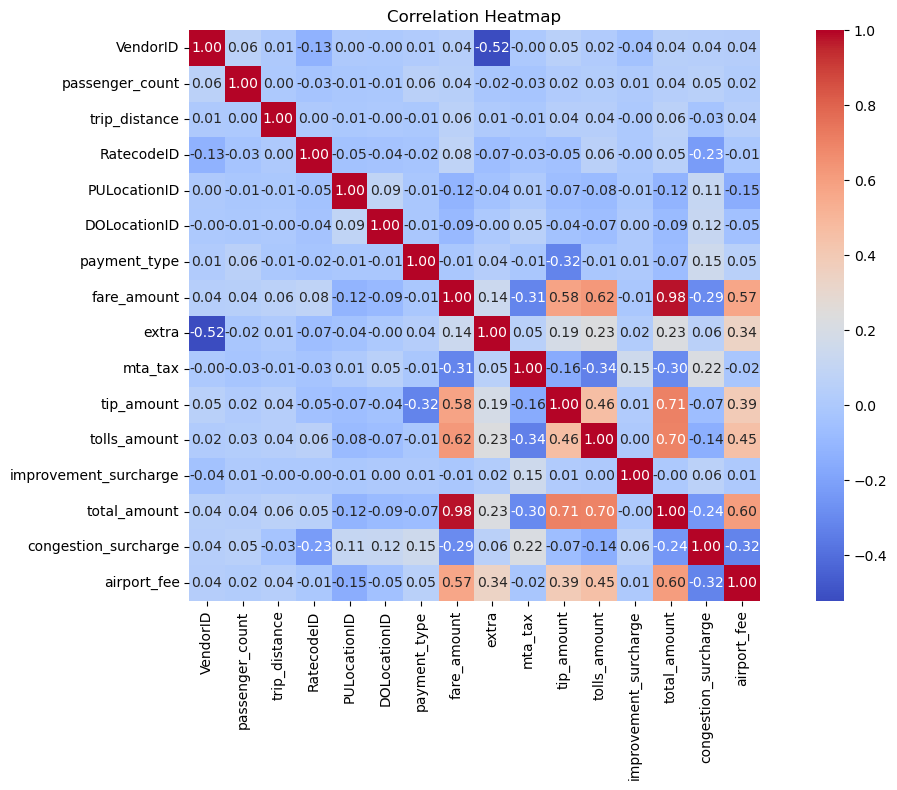

In [937]:
#Applying Heat map to find the corr
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

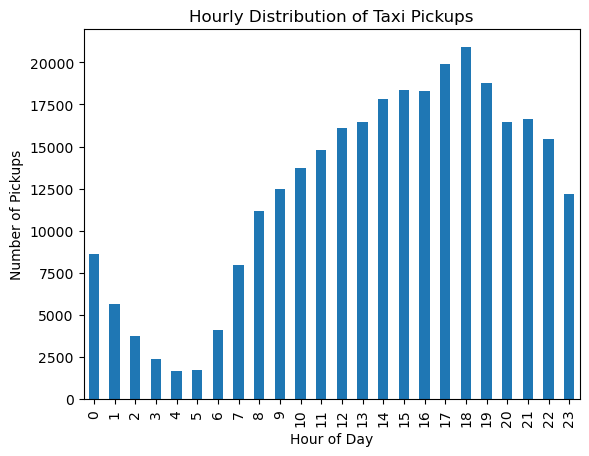

In [947]:
# Find and show the hourly trends in taxi pickups
# hourly trends in taxi pickups by using bar graph
hourly_counts = df['pickup_hour'].value_counts().sort_index().plot.bar()
plt.title('Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

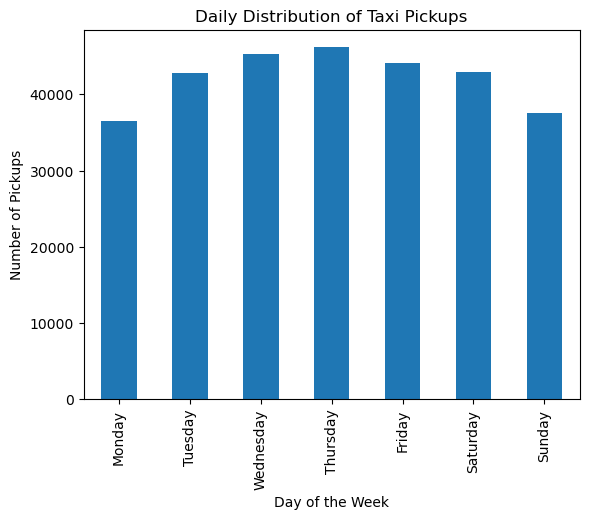

In [948]:
# Find and show the daily trends in taxi pickups (days of the week)
# Visualization daily trends using bar graph
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.day_name()
daily_counts = df['pickup_dayofweek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday',
                  'Thursday', 'Friday', 'Saturday', 'Sunday']).plot.bar()
plt.title('Daily Distribution of Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

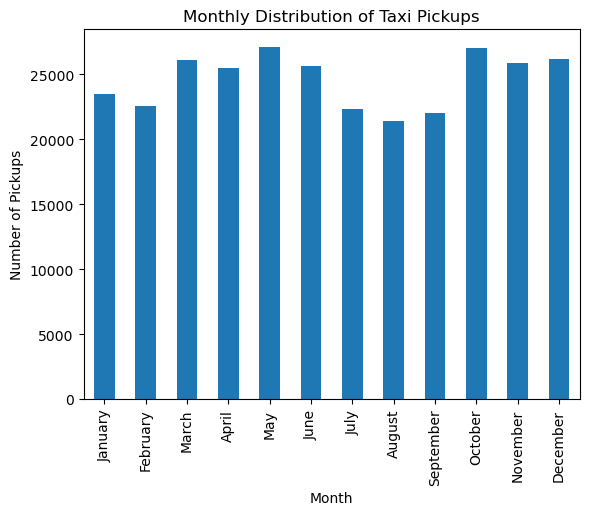

In [949]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
# Ordered Months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
# Reindexing Months name and Visualization using bar graph for Ordered Months
monthly_counts = df['pickup_month'].value_counts().reindex(month_order).plot.bar()
plt.title('Monthly Distribution of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [952]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
# by applying the loop fiding the 0 / negative values in the list
for col in financial_columns:
    zero_val = (df[col] == 0).sum()
    negative_val = (df[col] < 0).sum()
    print(f"{col}: {zero_val} zero values, {negative_val} negative values")


fare_amount: 86 zero values, 0 negative values
tip_amount: 68002 zero values, 0 negative values
total_amount: 50 zero values, 0 negative values
trip_distance: 5735 zero values, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [954]:
#Creaating the copy of the df to exclude(0/negative fare,tip,total,distance)
clean_df = df[
    (df['fare_amount'] > 0) & (df['tip_amount'] >= 0) & (df['total_amount'] > 0) & 
    (df['trip_distance'] > 0)].copy()

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {clean_df.shape}")

Original shape: (295348, 23)
Cleaned shape: (289576, 23)


In [955]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  
0  2023-04-21            1           Friday        April  
1  2023-01-10           14          Tuesday      January

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [957]:
# Create a df with non zero entries for the selected parameters.
clean_df = df[
    (df['fare_amount'] > 0) & (df['tip_amount'] >= 0) & (df['total_amount'] > 0) & 
    (df['trip_distance'] > 0)]
clean_df.shape


(289576, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [960]:
# Group data by month and analyse monthly revenue
# Visualising the pickup_month and total_amount
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().sort_index()
# ordered categorical
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']


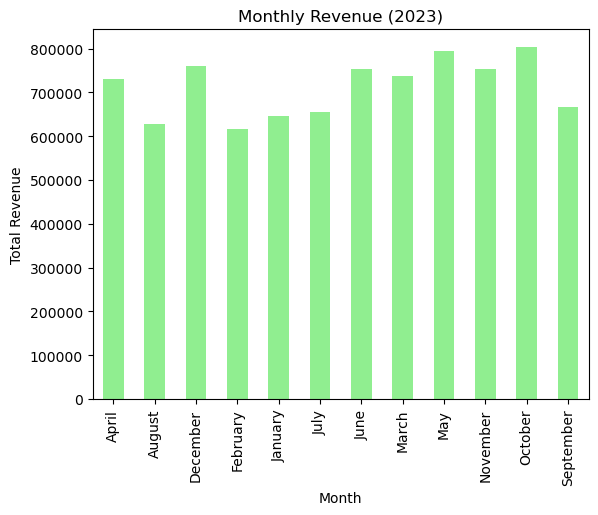

In [961]:
# To get the months in order
df['pickup_month'] = pd.Categorical(df['pickup_month'], categories=month_order, ordered=True)
#Visualisation Monthly Revenue
monthly_revenue.plot(kind='bar', color='lightgreen')
plt.title('Monthly Revenue (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [963]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum the revenue based on the same index
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion
quarterly_revenue['revenue_share_percent'] = (
    100 * quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()).round(2)

quarterly_revenue.head()

quarter  total_amount  revenue_share_percent
0        1    1999932.97                  23.40
1        2    2278857.58                  26.67
2        3    1948475.32                  22.80
3        4    2317765.56                  27.12

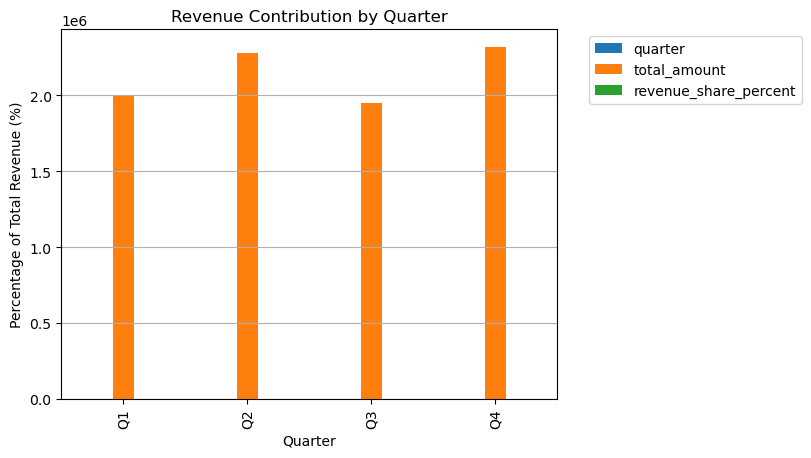

In [978]:
# Visualising Revinue by Quarters
quarterly_revenue.plot(kind='bar')
plt.title("Revenue Contribution by Quarter")
plt.ylabel("Percentage of Total Revenue (%)")
plt.xlabel("Quarter")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(axis='y')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [980]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  quarter  
0  2023-04-21            1           Friday        April        2  
1  2023-01-10           14          Tuesday      January        1

In [981]:
# Show how trip fare is affected by distance
#df.groupby('fare_amount')['trip_distance'].value_counts().plot.bar()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [983]:
# Calculate trip duration in minutes(pickup time to dropoff time)
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [984]:
#to find corr between fare and trip duration
corr1 = df[['fare_amount', 'trip_duration']].corr().iloc[0,1]
print(corr1)

0.2599648612256454


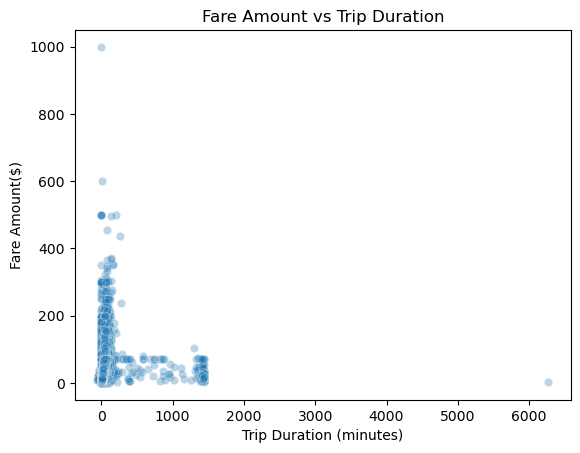

In [985]:
# Show relationship between fare and trip duration
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title("Fare Amount vs Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount($)")
plt.show()

In [986]:
#to find corr between fare and number of passengers
corr2 = df[['fare_amount', 'passenger_count']].corr().iloc[0,1]
corr2

0.04355026631696617

In [987]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5        5.50          0.00   
1             2         10.0    0.0      0.5        0.00          0.00   
2             1         70.0    0.0      0.5       10.00          6.55   
3             1         23.3    0.0      0.5        5.46          0.00   
4             1         11.4    2.5      0.5        3.58          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         27.50                   2.5         0.00   
1                    1.0         14.00                   2.5         0.00   
2                    1.0         89.30                   0.0         1.25   
3                    1.0         32.76                   2.5         0.00   
4                    1.0         21.48                   2.5         0.00   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  quarter  \
0  2023-04-21            1           Friday        April        2   
1  2023-01-10           14          Tuesday      January        1   
2  2023-02-04           15         Saturday     February        1   
3  2023-03-24           12           Friday        March        1   
4  2023-09-05           17          Tuesday    September        3   

   trip_duration  
0      12.050000  
1       9.216667  
2      43.966667  
3      26.133333  
4       9.266667

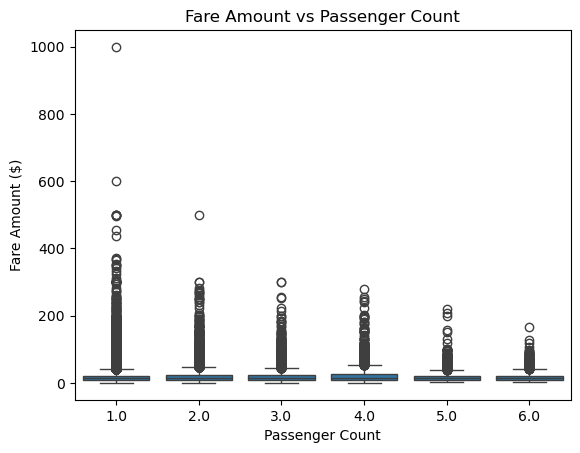

In [988]:
# Show relationship between fare and number of passengers
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.show()

In [989]:
#to find corr between tip and trip distance
corr3 = df[['tip_amount', 'trip_distance']].corr().iloc[0,1]
corr3

0.03879620490995417

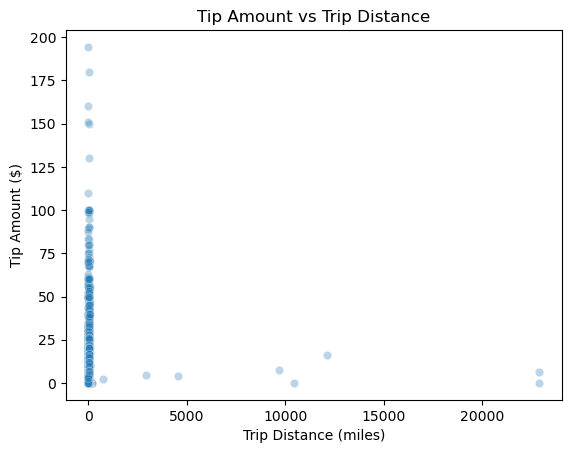

In [990]:
# Show relationship between tip and trip distance
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()


In [991]:
df.head(2)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  quarter  \
0  2023-04-21            1           Friday        April        2   
1  2023-01-10           14          Tuesday      January        1   

   trip_duration  
0      12.050000  
1       9.216667

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\3993430609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='payment_type', order=df['payment_type'].value_counts().index, palette='pastel')


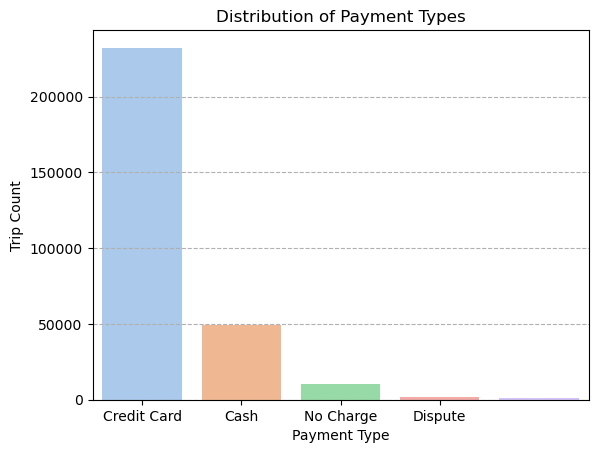

In [993]:
# Visualize the distribution of different payment types (payment_type).
payment_counts = df['payment_type'].value_counts().sort_index()
sns.countplot(data=df, x='payment_type', order=df['payment_type'].value_counts().index, palette='pastel')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Trip Count")
plt.xticks(ticks=[0,1,2,3],labels=['Credit Card','Cash','No Charge','Dispute'])
plt.grid(axis='y', linestyle='--')
plt.show()

In [996]:
# Analyse the distribution of different payment types (payment_type).
df['payment_type'].value_counts().sort_index()

payment_type
0     10223
1    232249
2     49471
3      1321
4      2084
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1004]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1009]:
import geopandas as gpd
# Read the shapefile using geopandas
# reading the .shp file using gpd
zones = gpd.read_file('Downloads/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

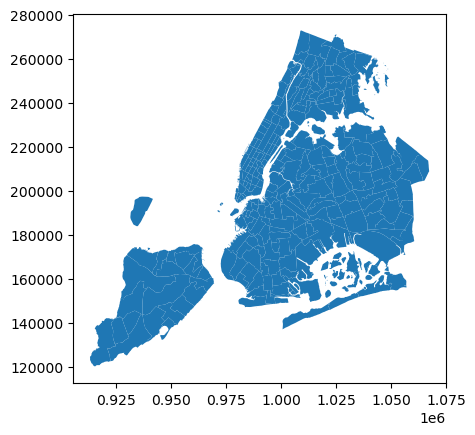

In [1011]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1016]:
# Merge zones and trip records using locationID and PULocation
df = pd.merge(df,zones,how='left',left_on='PULocationID', right_on='LocationID')
df.head(2)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  quarter  \
0  2023-04-21            1           Friday        April        2   
1  2023-01-10           14          Tuesday      January        1   

   trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0      12.050000      24.0    0.047000    0.000061   
1       9.216667     186.0    0.024696    0.000037   

                           zone  LocationID    borough  \
0                  Bloomingdale        24.0  Manhattan   
1  Penn Station/Madison Sq West       186.0  Manhattan   

                                            geometry  
0  POLYGON ((995453.114 230274.267, 995312.583 23...  
1  POLYGON ((986752.603 210853.699, 986627.863 21...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1020]:
# Group data by location and calculate the number of trips
# the number of trips for each location ID
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_trip_count')
pickup_counts = pickup_counts.sort_values(by='pickup_trip_count', ascending=False).reset_index()
pickup_counts

index  PULocationID  pickup_trip_count
0      118           132              15187
1      215           237              13826
2      146           161              13595
3      214           236              12439
4      147           162              10459
..     ...           ...                ...
236    185           204                  1
237      6             8                  1
238     27            31                  1
239     58            64                  1
240    102           115                  1

[241 rows x 3 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1022]:
# Merge trip counts back to the zones GeoDataFrame
zones = df.merge(pickup_counts, how='left', left_on='LocationID', right_on='PULocationID')
zones[['zone', 'pickup_trip_count']].head()

zone  pickup_trip_count
0                  Bloomingdale              756.0
1  Penn Station/Madison Sq West            10132.0
2                   JFK Airport            15187.0
3  Penn Station/Madison Sq West            10132.0
4           Lincoln Square East             9743.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

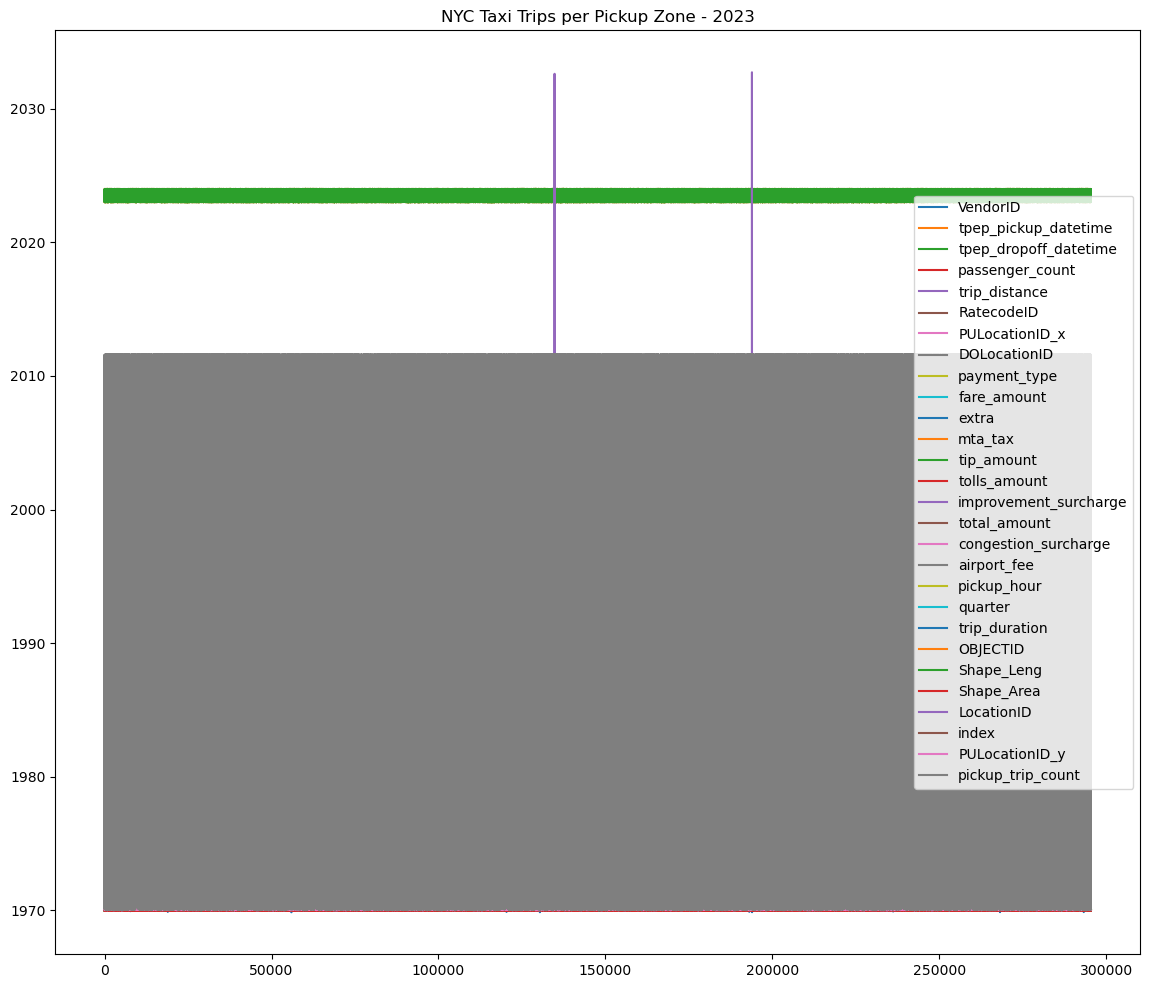

In [1027]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
# Plot the map and display by zones.plot()
zones.plot(column='pickup_trip_count',ax=ax,legend=True)
plt.title('NYC Taxi Trips per Pickup Zone - 2023')
plt.show()



In [1028]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones.sort_values(by='pickup_trip_count', ascending=False)

# Displaying top 10 zones
sorted_zones[['zone', 'borough', 'pickup_trip_count']].head(10)

zone borough  pickup_trip_count
160016  JFK Airport  Queens            15187.0
86389   JFK Airport  Queens            15187.0
111717  JFK Airport  Queens            15187.0
66218   JFK Airport  Queens            15187.0
252599  JFK Airport  Queens            15187.0
13666   JFK Airport  Queens            15187.0
273705  JFK Airport  Queens            15187.0
185861  JFK Airport  Queens            15187.0
286473  JFK Airport  Queens            15187.0
66226   JFK Airport  Queens            15187.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

In [1036]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  quarter  \
0  2023-04-21            1           Friday        April        2   
1  2023-01-10           14          Tuesday      January        1   

   trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0      12.050000      24.0    0.047000    0.000061   
1       9.216667     186.0    0.024696    0.000037   

                           zone  LocationID    borough  \
0                  Bloomingdale        24.0  Manhattan   
1  Penn Station/Madison Sq West       186.0  Manhattan   

                                            geometry  
0  POLYGON ((995453.114 230274.267, 995312.583 23...  
1  POLYGON ((986752.603 210853.699, 986627.863 21...

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1038]:
# Find routes which have the slowest speeds at different times of the day
# Converting minutes into hour
df['trip_duration_hr'] = df['trip_duration'] / 60

# Filter out invalid entries
valid_df = df[(df['trip_duration_hr'] > 0) & (df['trip_distance'] > 0)]

In [1039]:
# Group by pickup, dropoff, and hour to get average values
grouped = valid_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour','zone']).agg({
    'trip_distance': 'mean','trip_duration_hr': 'mean'}).reset_index()

In [1053]:
# Calculate average speed
grouped['average_speed_mph'] = grouped['trip_distance'] / grouped['trip_duration_hr']

# Sort by slowest speeds
slowest_routes = grouped.sort_values(by='average_speed_mph').head(10)
slowest_routes

PULocationID  DOLocationID  pickup_hour                     zone  \
45488           194           194           15          Randalls Island   
34235           151            24            1         Manhattan Valley   
2881             43            10           10             Central Park   
18134           113           235           22  Greenwich Village North   
30327           142           142            5      Lincoln Square East   
45489           194           194           16          Randalls Island   
6901             67           215           15            Dyker Heights   
33175           148            33           17          Lower East Side   
41595           166            42           10      Morningside Heights   
33769           148           164           16          Lower East Side   

       trip_distance  trip_duration_hr  average_speed_mph  
45488          0.040         14.593056           0.002741  
34235          0.510         23.930556           0.021312  
2881           0.020          0.899444           0.022236  
18134          0.280          5.820556           0.048105  
30327          0.575         11.801389           0.048723  
45489          0.010          0.204444           0.048913  
6901           0.100          1.280556           0.078091  
33175          2.480         23.975833           0.103437  
41595          2.420         22.889722           0.105724  
33769          2.490         23.465000           0.106115

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

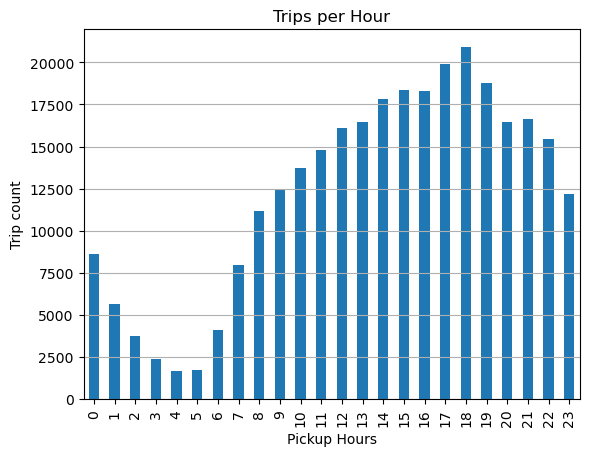

In [1056]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df['pickup_hour'].value_counts().sort_index().plot.bar()
plt.title("Trips per Hour")
plt.xlabel("Pickup Hours")
plt.ylabel('Trip count')
plt.grid(axis='y')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [1059]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
hourly_trips_actual = df['pickup_hour'].value_counts().sort_index() / sample_fraction

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\4290115693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips_actual.index, y=hourly_trips_actual.values,palette= 'viridis')


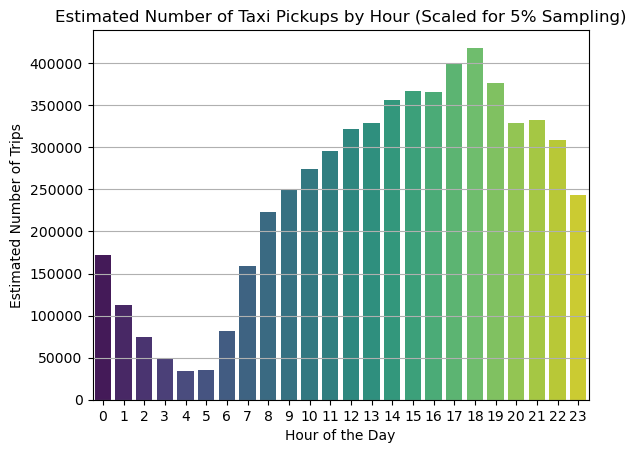

In [1060]:
# Visualizing hourly trend
sns.barplot(x=hourly_trips_actual.index, y=hourly_trips_actual.values,palette= 'viridis')
plt.title("Estimated Number of Taxi Pickups by Hour (Scaled for 5% Sampling)")
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Trips")
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [1062]:
# Compare traffic trends for the week days and weekends
# Extract the day of the week (0 = Monday, ..., 6 = Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Create a new column: 'Weekday' or 'Weekend'
df['day_type'] = df['day_of_week'].apply(lambda x: 'Week_end' if x >= 5 else 'Weekday')
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   
5         2  2023-11-15 08:41:24   2023-11-15 09:01:54              1.0   
6         2  2023-01-27 08:00:44   2023-01-27 08:18:51              2.0   
7         1  2023-06-01 20:15:14   2023-06-01 21:01:54              1.0   
8         2  2023-12-13 09:17:12   2023-12-13 09:28:09              1.0   
9         1  2023-04-14 15:18:15   2023-04-14 15:20:36              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   
5           2.24         1.0                  N           236           161   
6           2.68         1.0                  N           140            74   
7          17.00         2.0                  N           164           132   
8           1.51         1.0                  N           162           234   
9           0.30         1.0                  N           239           238   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5        5.50          0.00   
1             2         10.0    0.0      0.5        0.00          0.00   
2             1         70.0    0.0      0.5       10.00          6.55   
3             1         23.3    0.0      0.5        5.46          0.00   
4             1         11.4    2.5      0.5        3.58          0.00   
5             1         18.4    0.0      0.5        5.60          0.00   
6             1         17.7    0.0      0.5        5.42          0.00   
7             2         70.0    2.5      0.5        0.00          6.55   
8             1         11.4    0.0      0.5        3.08          0.00   
9             2          4.4    2.5      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         27.50                   2.5         0.00   
1                    1.0         14.00                   2.5         0.00   
2                    1.0         89.30                   0.0         1.25   
3                    1.0         32.76                   2.5         0.00   
4                    1.0         21.48                   2.5         0.00   
5                    1.0         28.00                   2.5         0.00   
6                    1.0         27.12                   2.5         0.00   
7                    1.0         80.55                   2.5         0.00   
8                    1.0         18.48                   2.5         0.00   
9                    1.0          8.40                   2.5         0.00   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  quarter  \
0  2023-04-21            1           Friday        April        2   
1  2023-01-10           14          Tuesday      January        1   
2  2023-02-04           15         Saturday     February        1   
3  2023-03-24           12           Friday        March        1   
4  2023-09-05           17          Tuesday    September        3   
5  2023-11-15            8        Wednesday     November        4   
6  2023-01-27            8           Friday      January        1   
7  2023-06-01           20         Thursday         June        2   
8  2023-12-13          

ConversionError: Failed to convert value(s) to axis units: 'Weekday'

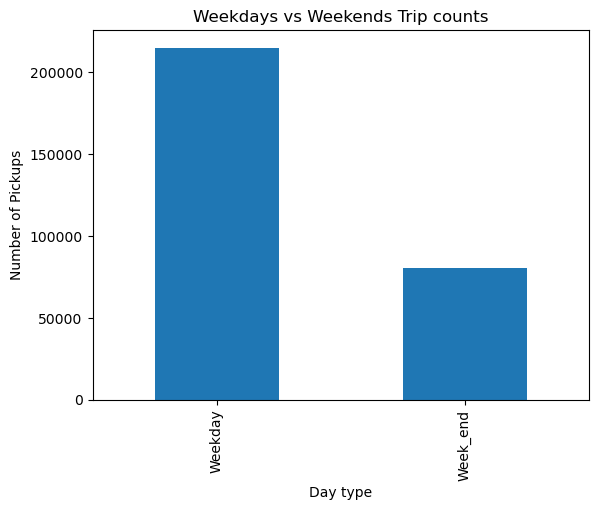

In [1063]:
# Compare traffic trends for the week days and weekends
weekly_pickups = df['day_type'].value_counts().plot.bar()
plt.title('Weekdays vs Weekends Trip counts')
plt.xlabel('Day type')
plt.ylabel('Number of Pickups')
plt.xticks('Weekday','Weekend')
plt.grid(axis='y')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\1916529616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pickups, x='zone', y='trip_count', palette='viridis')


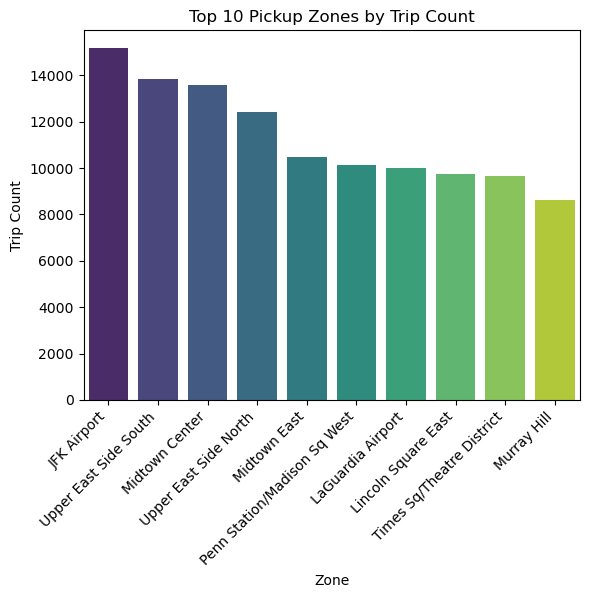

In [1120]:
# Find top 10 pickup and dropoff zones
pickup_counts = df.groupby(['PULocationID', 'zone']).size().reset_index(name='trip_count')

# Sort by trip count descending
top_pickups = pickup_counts.sort_values(by='trip_count', ascending=False).head(10)

sns.barplot(data=top_pickups, x='zone', y='trip_count', palette='viridis')
plt.title('Top 10 Pickup Zones by Trip Count')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zone')
plt.ylabel('Trip Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\2956682494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dropoff_counts, x='zone', y='trip_count', palette='viridis')


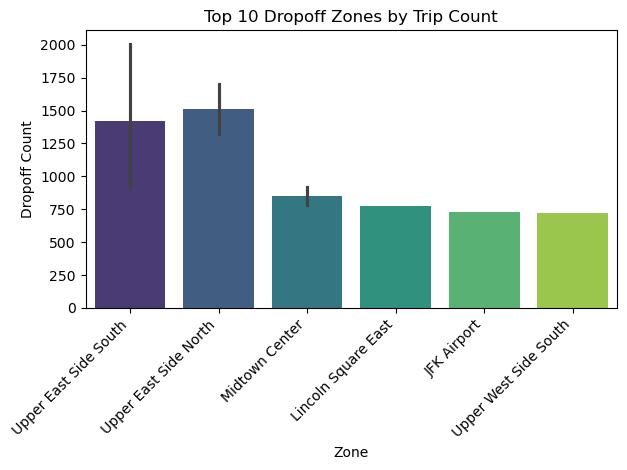

In [1122]:
#Top 10 dropoff zones
dropoff_counts = df.groupby(['DOLocationID', 'zone']).size().reset_index(name='trip_count')

# Sort by trip count descending
top_dropoff_counts = dropoff_counts.sort_values(by='trip_count', ascending=False).head(10)
sns.barplot(data=top_dropoff_counts, x='zone', y='trip_count', palette='viridis')
plt.title('Top 10 Dropoff Zones by Trip Count')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zone')
plt.ylabel('Dropoff Count')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [1125]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Align indexes and fill missing values with 0
all_location_ids = pickup_counts.index.union(dropoff_counts.index)

pickup_counts = pickup_counts.reindex(all_location_ids, fill_value=0)
dropoff_counts = dropoff_counts.reindex(all_location_ids, fill_value=0)

# Calculate the ratio (avoid division by 0)
ratios = pickup_counts / dropoff_counts.replace(0, float('nan'))

# Drop NaNs (where dropoff was zero)
ratios = ratios.dropna()
top_10 = ratios.sort_values(ascending=False).head(10)


In [1126]:
top_10

70     8.820000
132    4.232720
138    2.664628
186    1.584858
114    1.400703
43     1.398300
44     1.333333
5      1.333333
249    1.289097
162    1.244675
Name: count, dtype: float64

In [1129]:
bottom_10 = ratios.sort_values().head(10)
bottom_10

59     0.0
30     0.0
214    0.0
206    0.0
46     0.0
187    0.0
184    0.0
245    0.0
27     0.0
221    0.0
Name: count, dtype: float64

In [1131]:
location_zone_map = df[['PULocationID', 'zone']].drop_duplicates().set_index('PULocationID')['zone']
top_10_zones = top_10.to_frame(name='ratio').join(location_zone_map, how='left')
bottom_10_zones = bottom_10.to_frame(name='ratio').join(location_zone_map, how='left')
top_10_zones

ratio                          zone
70   8.820000                 East Elmhurst
132  4.232720                   JFK Airport
138  2.664628             LaGuardia Airport
186  1.584858  Penn Station/Madison Sq West
114  1.400703       Greenwich Village South
43   1.398300                  Central Park
44   1.333333        Charleston/Tottenville
5    1.333333                 Arden Heights
249  1.289097                  West Village
162  1.244675                  Midtown East

In [1132]:
bottom_10_zones

ratio zone
59     0.0  NaN
30     0.0  NaN
214    0.0  NaN
206    0.0  NaN
46     0.0  NaN
187    0.0  NaN
184    0.0  NaN
245    0.0  NaN
27     0.0  NaN
221    0.0  NaN

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1134]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Filter for night hours (23 to 5)
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Note that the top zones should be of night hours and not the overall top zones
night_pickup_counts = night_df['PULocationID'].value_counts().head(10)
night_dropoff_counts = night_df['DOLocationID'].value_counts().head(10)

In [1135]:
id_to_zone = dict(zones[['LocationID', 'zone']].values)

# Map IDs to zone names
top_night_pickups = night_pickup_counts.rename(index=id_to_zone)
top_night_dropoffs = night_dropoff_counts.rename(index=id_to_zone)

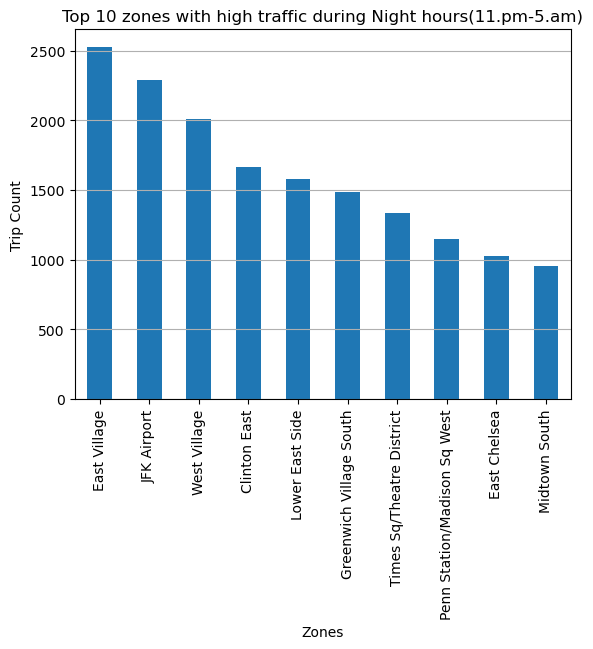

In [1136]:
top_night_pickups.plot.bar()
plt.title('Top 10 zones with high traffic during Night hours(11.pm-5.am)')
plt.ylabel('Trip Count')
plt.xlabel('Zones')
plt.grid(axis='y')
plt.show()

Top 10 Night Dropoffs
:  Axes(0.125,0.11;0.775x0.77)


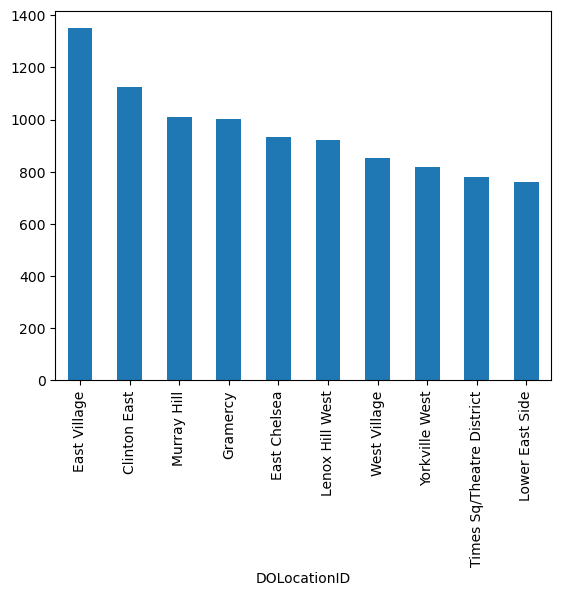

In [1137]:
print('Top 10 Night Dropoffs\n: ',top_night_dropoffs.plot.bar())

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Text(0.5, 1.0, 'Revenue Share Night vs Day')

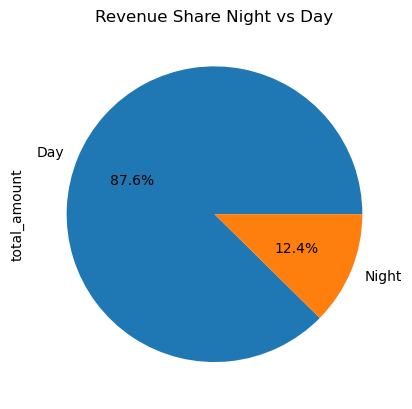

In [1139]:
# Filter for night hours (11 PM to 5 AM)
# Define night hours
night_hours= [23, 0, 1, 2, 3, 4, 5]

# Create a new column classifying time as Night or day
df['time_period'] = df['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')

# Group by 'time_period' and sum the total_amount
revenue_by_time = df.groupby('time_period')['total_amount'].sum()

# Calculate revenue share
revenue_share = (revenue_by_time / revenue_by_time.sum()) * 100
revenue_share.plot.pie(autopct='%1.1f%%')
plt.title('Revenue Share Night vs Day')

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [1142]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter valid trips
valid_fare = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Calculate fare per mile per passenger
valid_fare['fare_per_mile_per_passenger'] = valid_fare['fare_amount'] / (
    valid_fare['trip_distance'] * valid_fare['passenger_count'])



In [1143]:
# Group by passenger count and calculate average fare per mile per passenger
fare_strategy = valid_fare.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_strategy

passenger_count  fare_per_mile_per_passenger
0              1.0                    10.823147
1              2.0                     6.997105
2              3.0                     4.433974
3              4.0                     3.788561
4              5.0                     1.768596
5              6.0                     1.321913

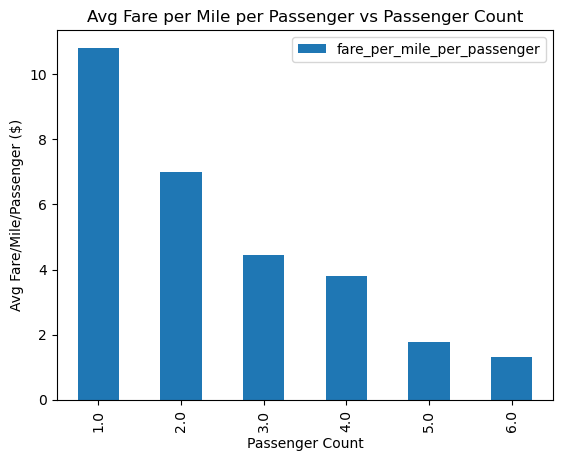

In [1146]:
# Visualization of fare strategy
fare_strategy.plot.bar(x='passenger_count', y='fare_per_mile_per_passenger')
plt.title("Avg Fare per Mile per Passenger vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Avg Fare/Mile/Passenger ($)")
plt.show()

In [1147]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5         5.5           0.0   
1             2         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          27.5                   2.5          0.0   
1                    1.0          14.0                   2.5          0.0   

  pickup_date  pickup_hour pickup_dayofweek pickup_month  quarter  \
0  2023-04-21            1           Friday        April        2   
1  2023-01-10           14          Tuesday      January        1   

   trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0      12.050000      24.0    0.047000    0.000061   
1       9.216667     186.0    0.024696    0.000037   

                           zone  LocationID    borough  \
0                  Bloomingdale        24.0  Manhattan   
1  Penn Station/Madison Sq West       186.0  Manhattan   

                                            geometry  trip_duration_hr  \
0  POLYGON ((995453.114 230274.267, 995312.583 23...          0.200833   
1  POLYGON ((986752.603 210853.699, 986627.863 21...          0.153611   

   day_of_week day_type time_period  
0            4  Weekday       Night  
1            1  Weekday         Day

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [1149]:
# Compare the average fare per mile for different days and for different times of the day
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

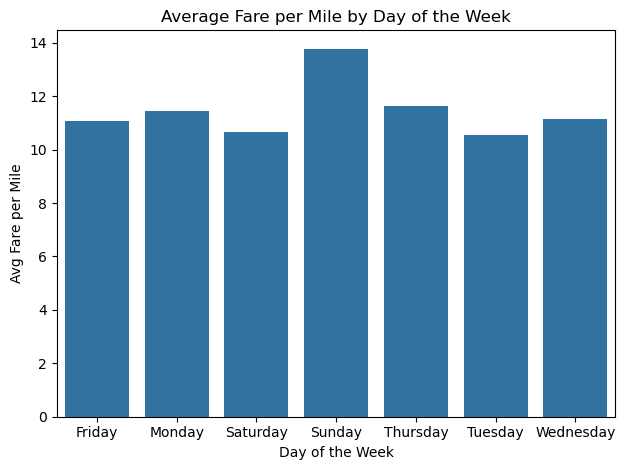

In [1150]:
# Avg Fare per mile in week collected
fare_by_day = df.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()

sns.barplot(data=fare_by_day, x='pickup_dayofweek', y='fare_per_mile')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Avg Fare per Mile')
plt.tight_layout()
plt.show()


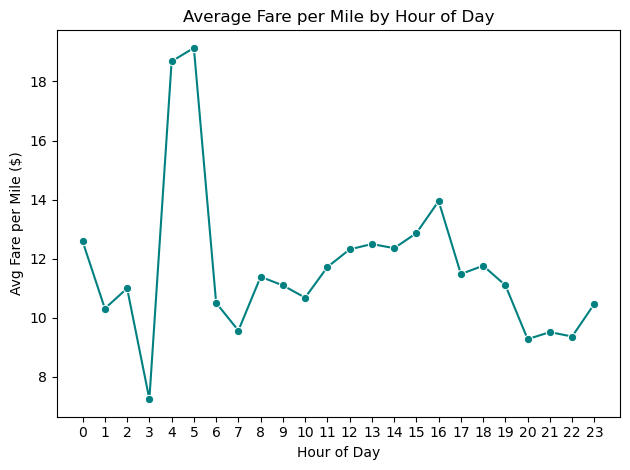

In [1151]:
fare_by_hour = df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
sns.lineplot(data=fare_by_hour, x='pickup_hour', y='fare_per_mile', marker='o', color='teal')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [1153]:
df.VendorID.value_counts()

VendorID
2    217529
1     71995
6        71
Name: count, dtype: int64

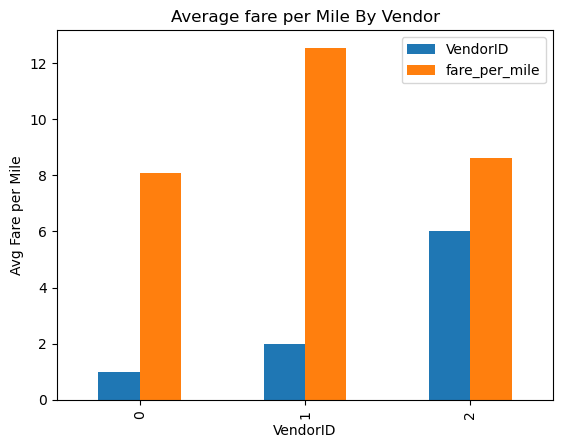

In [1154]:
# Compare fare per mile for different vendors
vendors_fare_per_mile = df.groupby('VendorID')['fare_per_mile'].mean().reset_index().plot.bar()
plt.title("Average fare per Mile By Vendor")
plt.xlabel('VendorID')
plt.ylabel('Avg Fare per Mile')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [1156]:
# Defining distance tiers
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()

def distance_tier(dist):
    if dist <= 2:
        return 'Short (<= miles)'
    elif dist <=5:
        return 'Medium (2-5 miles)'
    elif dist > 5:
        return 'Long (>5 miles)'
df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)

# Group by vendor and distance tier
tiered_vendor_fare = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
tiered_vendor_fare

VendorID       distance_tier  fare_per_mile
0         1     Long (>5 miles)       4.414199
1         1  Medium (2-5 miles)       6.378130
2         1    Short (<= miles)       9.866701
3         2     Long (>5 miles)       4.490153
4         2  Medium (2-5 miles)       6.541086
5         2    Short (<= miles)      18.369224
6         6     Long (>5 miles)       4.315637
7         6  Medium (2-5 miles)       8.817831
8         6    Short (<= miles)      81.969435

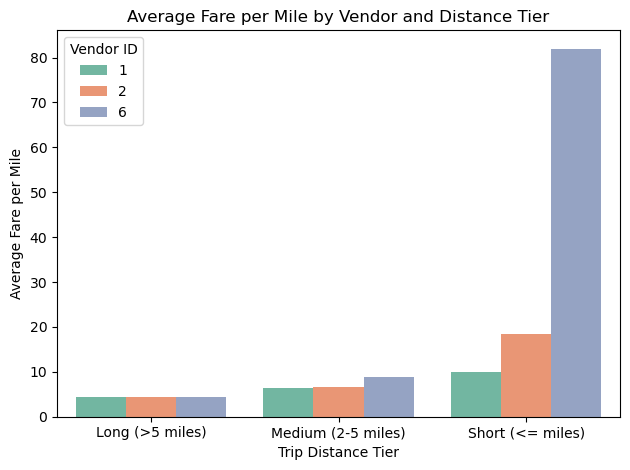

In [1157]:
sns.barplot(data=tiered_vendor_fare, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='Set2')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.xlabel('Trip Distance Tier')
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [1161]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_tip = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)].copy()

# Tip percentage as proportion of fare
df_tip['tip_pct'] = (df_tip['tip_amount'] / df_tip['fare_amount']) * 100

# Define trip distance bins
bins = [0, 2, 5, 10, 20, df_tip['trip_distance'].max()]
labels = ['0-2', '2-5', '5-10', '10-20', '20+']
df_tip['distance_bin'] = pd.cut(df_tip['trip_distance'], bins=bins, labels=labels)

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\1389043682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df_tip.groupby('distance_bin')['tip_pct'].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_11904\1389043682.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_bin', y='tip_pct', data=tip_by_distance, palette='coolwarm')


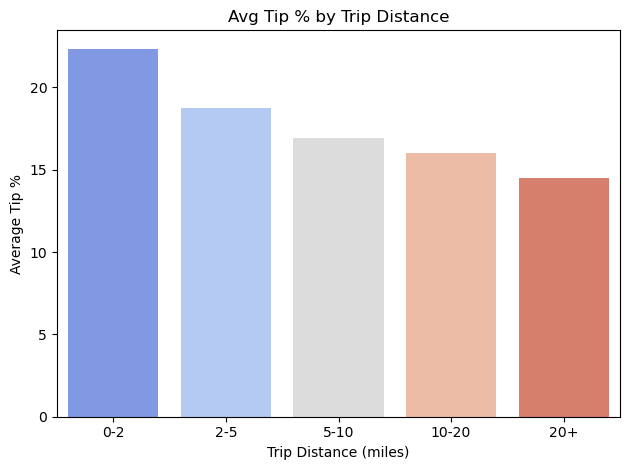

In [1162]:
# Group and compute mean tip percent
tip_by_distance = df_tip.groupby('distance_bin')['tip_pct'].mean().reset_index()

# Tip vs Distance
sns.barplot(x='distance_bin', y='tip_pct', data=tip_by_distance, palette='coolwarm')
plt.title("Avg Tip % by Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Tip %")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\592033573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='tip_pct', data=tip_by_passenger, palette='viridis')


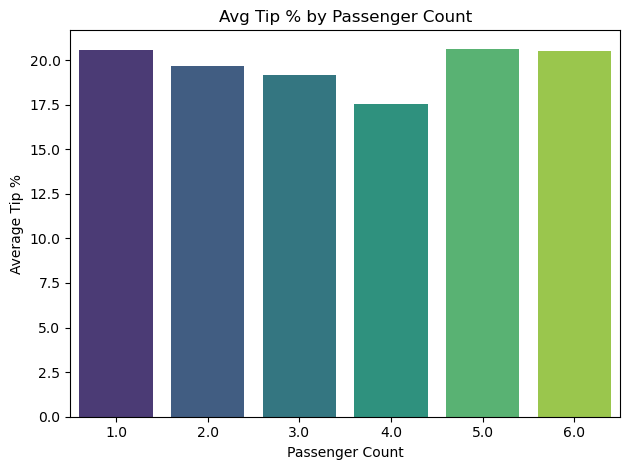

In [1163]:
# Tip vs Passenger Count
tip_by_passenger = df_tip.groupby('passenger_count')['tip_pct'].mean().reset_index()
sns.barplot(x='passenger_count', y='tip_pct', data=tip_by_passenger, palette='viridis')
plt.title("Avg Tip % by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip %")
plt.tight_layout()
plt.show()

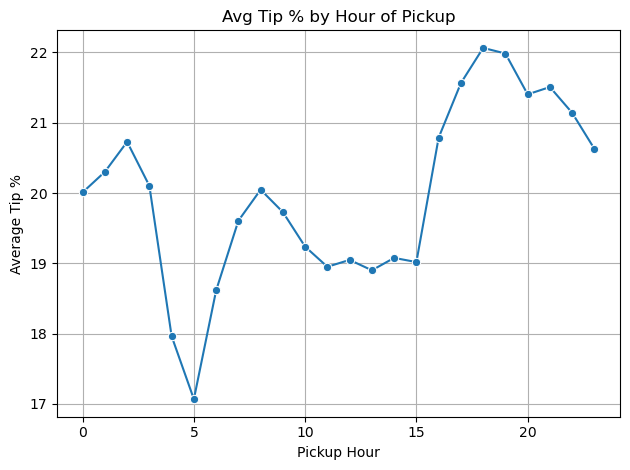

In [1164]:
# Tip vs Pickup Hour
tip_by_hour = df_tip.groupby('pickup_hour')['tip_pct'].mean().reset_index()
sns.lineplot(x='pickup_hour', y='tip_pct', data=tip_by_hour, marker='o')
plt.title("Avg Tip % by Hour of Pickup")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip %")
plt.grid(True)
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [1166]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

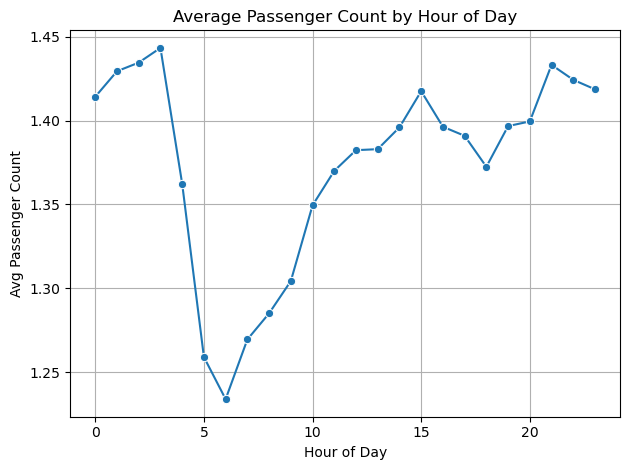

In [1168]:
# See how passenger count varies across hours and days
# Group by passenger count vs Hours
hourly_passenger = df.groupby('pickup_hour')['passenger_count'].mean().reset_index()
sns.lineplot(data=hourly_passenger, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11904\3785739357.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_passenger, x='pickup_dayofweek', y='passenger_count', palette='coolwarm')


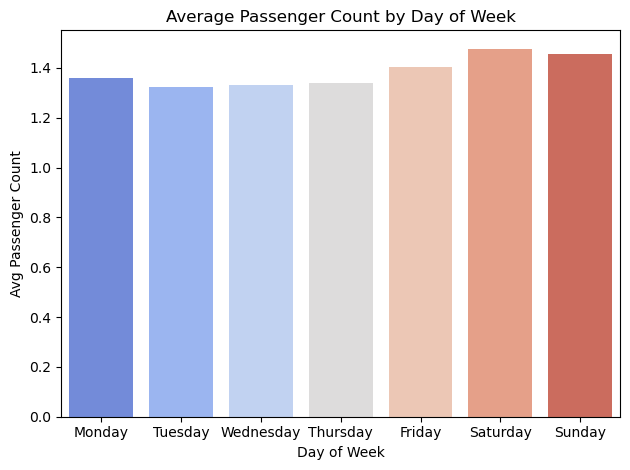

In [1169]:
#Grouping by day vs Week
daily_passenger = df.groupby('pickup_dayofweek')['passenger_count'].mean().reset_index()
# Sort by weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger['pickup_dayofweek'] = pd.Categorical(daily_passenger['pickup_dayofweek'], categories=weekday_order, ordered=True)
daily_passenger = daily_passenger.sort_values('pickup_dayofweek')

sns.barplot(data=daily_passenger, x='pickup_dayofweek', y='passenger_count', palette='coolwarm')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Passenger Count')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1171]:
# How does passenger count vary across zones
passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

if 'zone' in df.columns:
    passenger_by_zone = passenger_by_zone.merge
    (df[['PULocationID', 'zone']].drop_duplicates(),on='PULocationID',how='left')

# Remove duplicates again if needed
passenger_by_zone = passenger_by_zone.drop_duplicates(subset=['PULocationID'])

# Sort by average passenger count
passenger_by_zone = passenger_by_zone.sort_values(by='passenger_count', ascending=False)


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4037459019.py, line 6)

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\3276120261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20_zones, x='passenger_count', y='zone', palette='viridis')


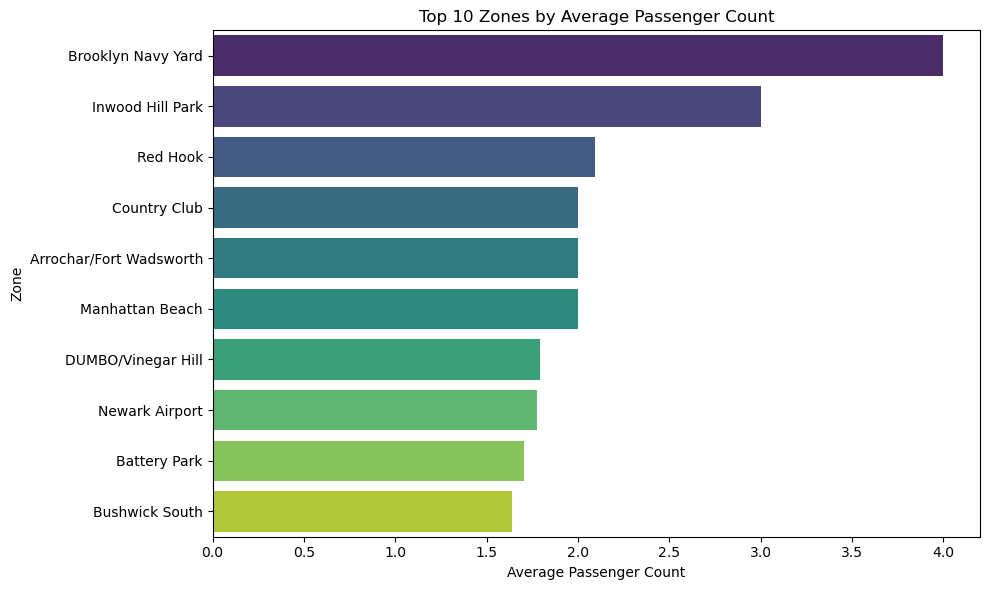

In [1172]:
top20_zones = passenger_by_zone.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top20_zones, x='passenger_count', y='zone', palette='viridis')
plt.title('Top 10 Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()

In [1174]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Calculate average passenger count per zone using PULocationID
avg_passenger_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge with GeoDataFrame on PULocationID = LocationID
zones_with_trips = df.merge(avg_passenger_zone,
    left_on='LocationID',right_on='PULocationID',how='left')


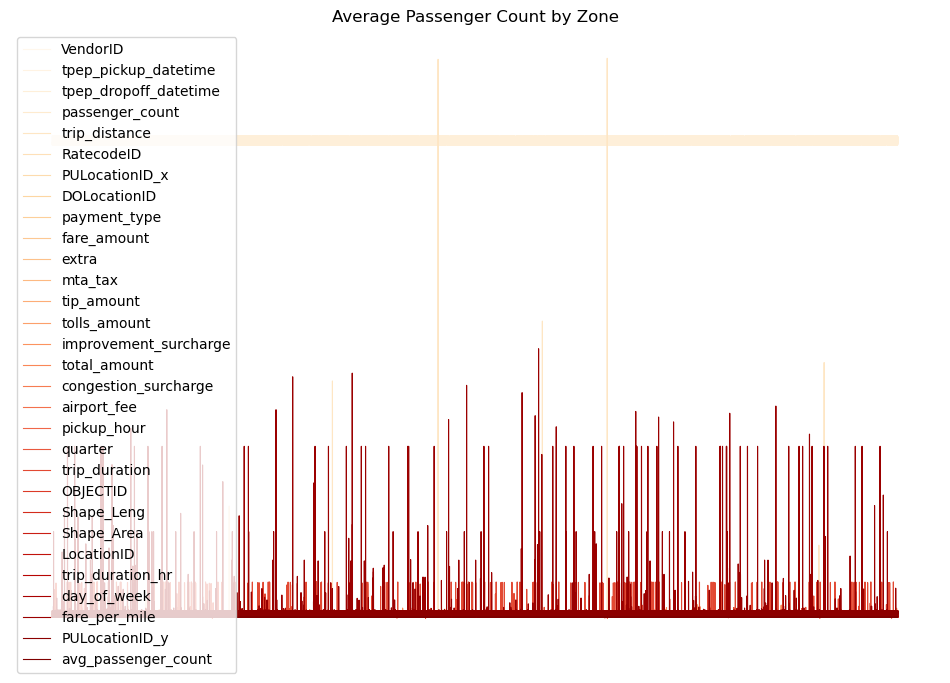

In [1176]:
fig, ax = plt.subplots(figsize=(12, 8))
zones_with_trips.plot(column='avg_passenger_count',cmap='OrRd',
    linewidth=0.8,ax=ax,legend=True)
plt.title("Average Passenger Count by Zone")
plt.axis('off')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [1179]:
# How often is each surcharge applied?
# Count how often each surcharge value occurs
surcharge_counts = {
    'extra': df['extra'].value_counts().sort_index(),
    'congestion_surcharge': df['congestion_surcharge'].value_counts().sort_index(),
    'improvement_surcharge': df['improvement_surcharge'].value_counts().sort_index(),
    'airport_fee': df['airport_fee'].value_counts().sort_index()}

for key, val in surcharge_counts.items():
    print(f"\nSurcharge type: {key}\n{val}")


Surcharge type: extra
extra
0.00     115262
0.03          1
0.19          1
0.50          2
0.75          2
1.00      57246
1.25        200
1.75        458
2.25        121
2.45          1
2.50      70787
2.75        306
3.00          8
3.20          7
3.25          1
3.50      15873
3.75        434
4.25        969
4.50          2
4.75          1
5.00      20152
5.25          2
6.00       2387
6.25        137
6.75        348
7.25         71
7.50       2551
7.75        227
8.50         52
8.75        324
9.25        984
9.75         87
10.00        79
10.25       272
11.25        51
11.75       189
Name: count, dtype: int64

Surcharge type: congestion_surcharge
congestion_surcharge
0.0     28035
2.5    261560
Name: count, dtype: int64

Surcharge type: improvement_surcharge
improvement_surcharge
0.0         7
0.3       217
1.0    289371
Name: count, dtype: int64

Surcharge type: airport_fee
airport_fee
0.00    264732
1.00         1
1.25      6125
1.75     18737
Name: count, dtype: int64


In [1180]:
# Group by pickup zone to find where congestion surcharge is commonly applied
congestion_by_zone = df[df['congestion_surcharge'] > 0].groupby('PULocationID').size().reset_index(name='congestion_count')

# Merge with zone names
congestion_by_zone = congestion_by_zone.merge(df[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Sort to find top zones
top_congestion_zones = congestion_by_zone.sort_values(by='congestion_count', ascending=False).head(10)
print(top_congestion_zones)


        PULocationID  congestion_count  LocationID                   zone
235984           237             13469       237.0  Upper East Side South
240429           237             13469       237.0  Upper East Side South
240427           237             13469       237.0  Upper East Side South
240426           237             13469       237.0  Upper East Side South
240425           237             13469       237.0  Upper East Side South
240424           237             13469       237.0  Upper East Side South
240423           237             13469       237.0  Upper East Side South
240422           237             13469       237.0  Upper East Side South
240421           237             13469       237.0  Upper East Side South
240420           237             13469       237.0  Upper East Side South


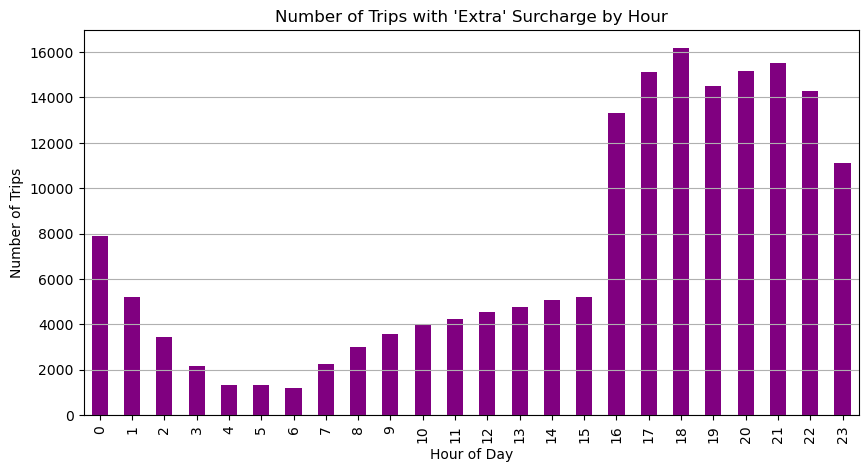

In [1181]:
# Plot when 'extra' charges are more common
extra_by_hour = df[df['extra'] > 0].groupby('pickup_hour').size()

plt.figure(figsize=(10,5))
extra_by_hour.plot(kind='bar', color='purple')
plt.title("Number of Trips with 'Extra' Surcharge by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.grid(axis='y')
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Optimization based on Time Dispatch, Route, Zones

    1. During 7-9.Am and 5-8.Pm highest picups are recorded, more in commercial, Office areas.
   > Increase cab availability in commercial areas during peak hours, pre-position taxies in these areas.

    2. Also Night demands are more between 11.pm-5.AM in entertainment districts and airports.
   > Drivers should be encouraged to work in night time.

    3.In the High pickup and low dropoff places causes idle time.
   > Encourage shared trip to redistribute dropoff evenly.

    4. Where longer trip durations and slower average speeds.
   > Avoid traffic by using real time traffic data as google maps or even personalized webs or interfaces.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1.High pickup activity was actively recorded in JKF Airport, Upper East South, Midtown Center, Upper East Side North
> Establish priority staging areas for idle taxis in these locations.

2.Weekends showed a shift in demand.
> Allot separate group of cabs for demand and seasonal events.
 
3. Month showed spikes in total ride counts due to holidays and tourism.
   ,Morning 12am -5am  and after 8pm - 11pm showes spike as peak hours.
> Scale cab availability and optimize routes during peak tourist seasons.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1.Vendor  2 consistently had slightly higher fare per mile in short distance trips.
> Rebalance vendor pricing to create more uniform rates across companies and avoid customer defection to cheaper services.

2.High fares were observed during peak traffic hours, yet tip percentages did not rise proportionally.
> Apply demand aware surge pricing cautiously during high-traffic hours to avoid drop in service usage.

3.Lower tip percentages were associated with short trips, higher passenger counts, and certain zones.
> Encourage better driver service quality and provide inride feedback tools to improve tipping behavior.

4.Sharing trip in bussy areas and long trips, which helps for maximum revenue generation.
> Encourage sharing trips with tag lines like (your new friend is waititng for you in cab if you wish) helps in cut cost and add special fare higher than regular, which feels premium for user for long trips.